# Stress-Projekt

ein Projekt von Veronika Ebner, Lena Hecker, Nadja Ozornina und Jördis Plagge

## Gliederung

1. Basics
    1.1. Packages importieren
    1.2. Daten einlesen
    1.3. Stichprobenbeschreibung
2. Mittelwertvergleiche (Geschlechter, Alter) 
3. Korrelationen (welche Faktoren korrelieren am stärksten miteinander)
4. Regression (welche Faktoren tragen am stärksten miteinander)
5. Clusteranalyse (ELbow Scree-Plot -> Vroni) 
    5.1. Mittelwertvergleiche (Gruppenvergleiche) --> Nadja 
    
Notizen: Work-Life-Balance Score ganz aus Datensatz rauskicken??

## 1. Basics

*1.1. Packages importieren*

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

*1.2. Datensatz laden und Datentypen überprüfen*

In [6]:
data = pd.read_csv('/Users/vroni/Documents/Wellbeing_and_lifestyle_data_Kaggle.csv', sep=',')

In [7]:
data

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [8]:
data.dtypes

Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS                object
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

Problem bei DAILY_STRESS: Variablentyp müsste int und nicht object sein -> Fehlersuche:

In [9]:
data[~data.DAILY_STRESS.str.isnumeric()]

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
10005,12/18/18 10:37,3,1/1/00,1,2,10,10,5,5,2,...,6,10,1,2,10,8,2,21 to 35,Male,682.6


Fall 10005 ausschließen, da keine numerische Zahl enthalten -> Alle Fälle bei DAILY_STRESS mit / ausschließen

In [10]:
data = data[data.DAILY_STRESS.str.contains('/')==False].copy()
#data.drop([10005], axis=0, inplace=True)

In [11]:
data

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


Daily_Stress in integer type umwandeln

In [12]:
data.DAILY_STRESS = data.DAILY_STRESS.astype(int)

In [13]:
data.dtypes

Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS                 int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object

Kontrolle für missing values -> Keine vorhanden

In [14]:
data.isna().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

*1.3. Stichprobenbeschreibung*

In [15]:
data.describe().round(3)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000,...,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000,15971.000
mean,2.923,2.792,5.233,5.508,5.616,6.474,4.001,2.715,1.411,5.746,...,5.704,3.752,7.043,2.898,2.931,1.729,5.711,3.326,6.234,666.751
std,1.443,1.368,3.312,2.840,3.242,3.087,2.756,1.852,0.492,2.624,...,2.891,3.231,1.199,3.692,2.676,0.445,3.090,2.729,3.016,45.021
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,480.000
25%,2.000,2.000,2.000,3.000,3.000,4.000,2.000,1.000,1.000,4.000,...,3.000,1.000,6.000,0.000,1.000,1.000,3.000,1.000,4.000,636.000
50%,3.000,3.000,5.000,5.000,5.000,6.000,3.000,3.000,1.000,6.000,...,5.000,3.000,7.000,0.000,2.000,2.000,5.000,3.000,7.000,667.700
75%,4.000,4.000,8.000,8.000,9.500,10.000,6.000,5.000,2.000,8.000,...,8.000,5.000,8.000,5.000,4.000,2.000,9.000,5.000,10.000,698.500
max,5.000,5.000,10.000,10.000,10.000,10.000,10.000,5.000,2.000,10.000,...,10.000,10.000,10.000,10.000,10.000,2.000,10.000,10.000,10.000,820.200


In [16]:
pd.crosstab(data.AGE, data.GENDER,data.DAILY_STRESS, aggfunc='mean').round(3)

GENDER,Female,Male
AGE,,
21 to 35,2.992,2.570
36 to 50,2.949,2.799
51 or more,2.729,2.419
Less than 20,3.045,2.347


Deskriptive Ergebnisse - Häufigkeiten: Geschlecht, Altersgruppen

In [17]:
data['GENDER'].value_counts()

Female    9858
Male      6113
Name: GENDER, dtype: int64

In [20]:
data['GENDER'].value_counts(normalize=True).round(4)

Female    0.6172
Male      0.3828
Name: GENDER, dtype: float64

In [21]:
data['AGE'].value_counts()

21 to 35        6107
36 to 50        4655
51 or more      3390
Less than 20    1819
Name: AGE, dtype: int64

In [22]:
data['AGE'].value_counts(normalize=True).round(4)

21 to 35        0.3824
36 to 50        0.2915
51 or more      0.2123
Less than 20    0.1139
Name: AGE, dtype: float64

In [30]:
tab = (pd.crosstab(data.AGE, data.GENDER, margins=True, normalize=True)*100).round(2)
tab
#Wie schafft man es, dass Häufigkeiten und Prozentwerte zusammen in einer Kreuztabelle stehen?

GENDER,Female,Male,All
AGE,,,
21 to 35,22.17,16.07,38.24
36 to 50,18.54,10.61,29.15
51 or more,14.34,6.88,21.23
Less than 20,6.67,4.72,11.39
All,61.72,38.28,100.00


In [31]:
tab.astype(str).apply(lambda x:x + '%')

GENDER,Female,Male,All
AGE,,,
21 to 35,22.17%,16.07%,38.24%
36 to 50,18.54%,10.61%,29.15%
51 or more,14.34%,6.88%,21.23%
Less than 20,6.67%,4.72%,11.39%
All,61.72%,38.28%,100.0%


## 3. Korrelationen

<AxesSubplot:>

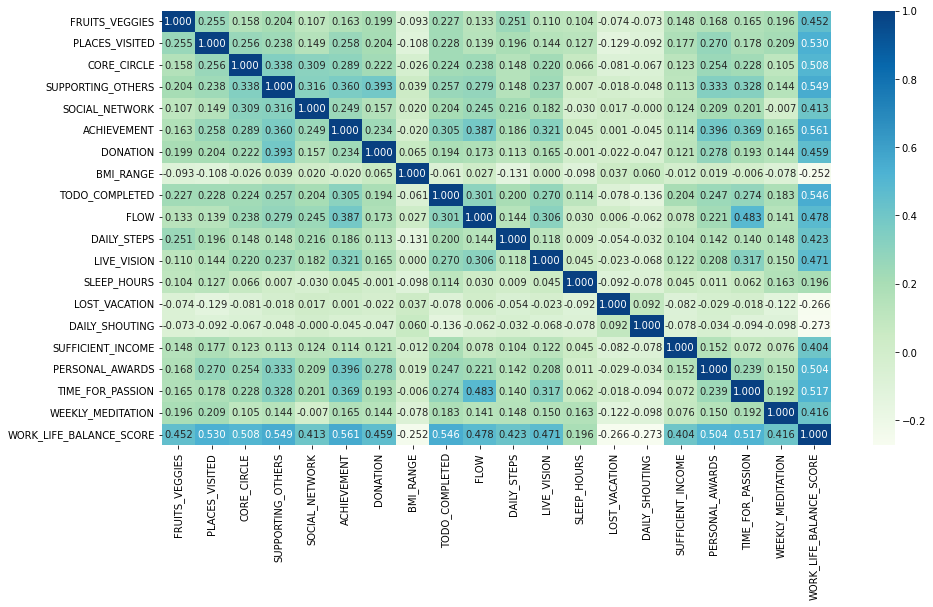

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data=data.corr(),annot=True, fmt='0.3f', cmap='GnBu')

Notizen: Liste mit allen Korrelationen >0.3 erstellen?; Beschreibenden Text einfügen/Interpretation

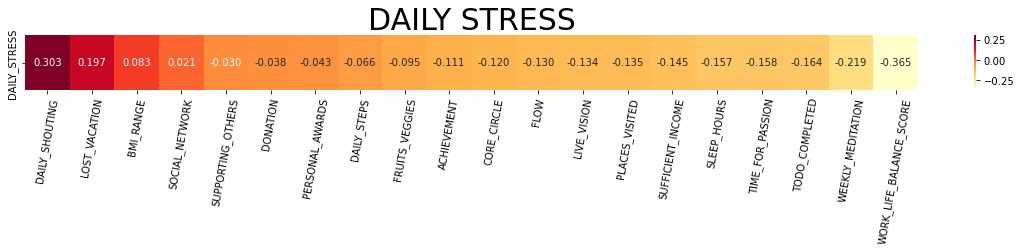

In [68]:
ds_corr = data.corr().iloc[1]
plt.figure(figsize=(20,1))
df_piv = pd.DataFrame({cname: ds_corr[ds_corr.index==cname].iloc[0] for cname in ds_corr.index},index=['DAILY_STRESS']);
df_piv.sort_values(axis=1, by='DAILY_STRESS', inplace=True, ascending=False)
df_piv.drop('DAILY_STRESS', inplace=True, axis=1)
sns.heatmap(df_piv, annot=True, fmt='0.3f', cmap='YlOrRd');
plt.xticks(rotation=80);
plt.title('DAILY STRESS', size=30);

## Clusteranalyse (Falco)

In [23]:
df2 = data[['DAILY_STRESS','ACHIEVEMENT']]

In [24]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(df2)

In [27]:
data["cluster"] = kmeans.labels_

In [28]:
data

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,cluster
0,7/7/15,3,2,2,5,0,5,2,0,1,...,5,5,1,4,0,5,36 to 50,Female,609.5,1
1,7/7/15,2,3,4,3,8,10,5,2,2,...,2,2,2,3,2,6,36 to 50,Female,655.6,0
2,7/7/15,2,3,3,4,4,10,3,2,2,...,10,2,2,4,8,3,36 to 50,Female,631.6,1
3,7/7/15,3,3,10,3,10,7,2,5,2,...,7,5,1,5,2,0,51 or more,Female,622.7,1
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,0,2,8,1,5,51 or more,Female,663.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,0,1,1,5,2,5,51 or more,Female,644.5,1
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,0,0,2,10,5,8,21 to 35,Female,714.9,0
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,0,1,2,10,1,10,21 to 35,Male,716.6,0
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,7,2,2,1,6,8,21 to 35,Female,682.0,1


## Clusteranalyse (Vroni)

In [23]:
from sklearn.cluster import KMeans
from sklearn import datasets

Neuer dataframe definiert df3: ohne age, gender, sufficient income und bmi (da komische operationalisierung bei letzteren zweien) --> alle restlichen Variablen als clusterbildende Variablen 

In [20]:
df3 = data[['FRUITS_VEGGIES','DAILY_STRESS','PLACES_VISITED','CORE_CIRCLE','SUPPORTING_OTHERS','SOCIAL_NETWORK','DONATION','TODO_COMPLETED','FLOW','DAILY_STEPS','LOST_VACATION','LIVE_VISION','SLEEP_HOURS','DAILY_SHOUTING','PERSONAL_AWARDS','TIME_FOR_PASSION','WEEKLY_MEDITATION','ACHIEVEMENT']]

In [26]:
df3

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,DONATION,TODO_COMPLETED,FLOW,DAILY_STEPS,LOST_VACATION,LIVE_VISION,SLEEP_HOURS,DAILY_SHOUTING,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,ACHIEVEMENT
0,3,2,2,5,0,5,0,6,4,5,5,0,7,5,4,0,5,2
1,2,3,4,3,8,10,2,5,2,5,2,5,8,2,3,2,6,5
2,2,3,3,4,4,10,2,2,2,4,10,5,8,2,4,8,3,3
3,3,3,10,3,10,7,5,3,5,5,7,0,5,5,5,2,0,2
4,5,1,3,3,10,4,4,5,0,5,0,0,7,0,8,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3,3,0,4,0,10,4,8,2,10,0,7,7,1,5,2,5,0
15968,3,3,6,8,7,4,3,7,5,6,0,5,6,0,10,5,8,6
15969,4,3,0,10,10,8,5,7,3,5,0,2,7,1,10,1,10,6
15970,1,1,10,8,2,7,2,6,10,1,7,5,8,2,1,6,8,3


*Elbow Diagramm um optimale Clusterlösung zu ermitteln*

Clusterlösungen zwischen 1 und 10 ausprobiert und als Elbow geplotted

In [43]:
distortions = []
K = range (1,10)
for k in K: 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df3)
    distortions.append(kmeanModel.inertia_)

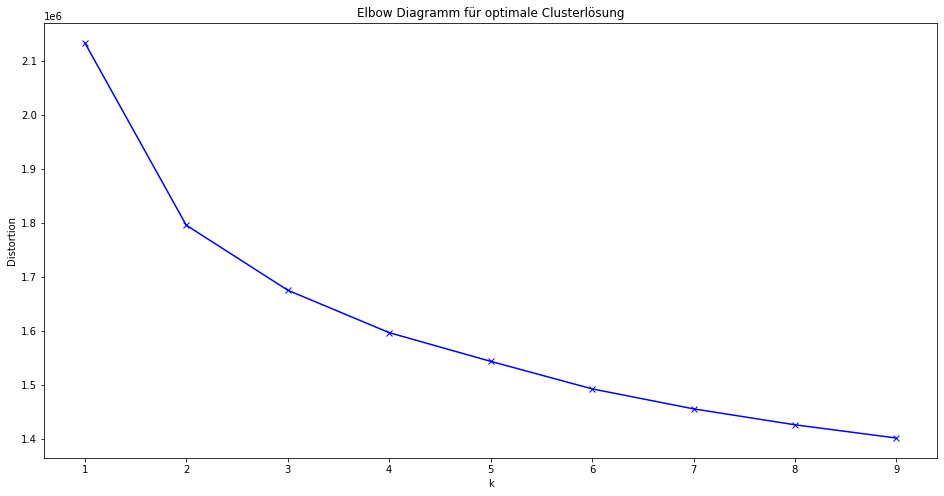

In [46]:
plt.figure(figsize=(16,8))
plt.plot(K,distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Diagramm für optimale Clusterlösung')
plt.show()

--> Elbow relativ inconclusive: Möglichkeiten zwischen 2 und 4 denkbar